### Μαντζαρόπουλος Κώστας

# Ε1

Αρχικά ας εισάγουμε τις βιβλιοθήκες που θα χρειαστούμε καθώς και τα δεδομένα μας.

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats.stats as stats

plt.style.use('ggplot');

In [57]:
country_scores = pd.read_excel("patel-sandefur-human-capital-final-results.xlsx", sheet_name='Country Scores')

In [58]:
country_scores.head()

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000


Στο `WDI_data` αρχείο παρατηρήσαμε κάποιες τιμές με τελείες εκεί που θα έπρεπε να υπάρχει ΝaN value, εξού και η τιμη της παραμέτρου στο `na_values` όταν εισάγουμε το αρχείο.

In [59]:
wdi = pd.read_excel('WDI_data.xlsx', na_values='..')
wdi.head()

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.016488
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,NaN
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.292517
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.199600


- Από όλο το dataframe μας ενδιαφέρει η στήλη `2015[YR2015]` και η πρώτη γραμμή για κάθε χώρα που αναφέρεται στο GDPPP κάθε χώρας ξεχωριστα.

- Επίσης διαλέγουμε ως δείκτη ολόκληρου του dataframe τη στήλη `Country Code`. Αυτό διότι παρατηρήσαμε πως ορισμένα ονόματα των χωρών διαφέρουν μεταξύ των δυο datasets ενώ οι κωδικοί των χωρών είναι καθολικοί.

- Τέλος μετονοματίζουμε την στήλη με το GDP και την μετατρέπουμε σε `float`.

In [60]:
wdi_GDP = wdi[wdi['Series Code']=='NY.GDP.PCAP.PP.KD']
wdi_GDP.set_index('Country Code', inplace=True)

In [61]:
wdi_GDP = wdi_GDP.drop(columns=['Series Name','Series Code'])
wdi_GDP.head()

,Country Name,2015 [YR2015]
Country Code,,
AFG,Afghanistan,1809.016488
ALB,Albania,10971.292517
DZA,Algeria,13724.723853
ASM,American Samoa,NaN
AND,Andorra,NaN


In [62]:
wdi_GDP = wdi_GDP.rename(columns={'2015 [YR2015]':'GDP2015'})

In [63]:
wdi_GDP['GDP2015'].astype(float);

In [64]:
wdi_GDP.sort_index()

,Country Name,GDP2015
Country Code,,
ABW,Aruba,NaN
AFG,Afghanistan,1809.016488
AGO,Angola,6231.067992
ALB,Albania,10971.292517
AND,Andorra,NaN
...,...,...
XKX,Kosovo,9097.136991
YEM,"Yemen, Rep.",2641.045829
ZAF,South Africa,12362.583814


- Ας ασχοληθούμε τώρα με το επόμενο dataset.

- Υπάρχουν αρκετές στήλες που δεν χρειαζόμαστε οπότε τις πετάμε και κρατάμε μόνον τις στήλες με του βαθμούς στα εκάστοτε τεστ.

In [65]:
country_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Country                                               78 non-null     object 
 1   Country Code                                          78 non-null     object 
 2   Percent Above Math Benchmark (400 on TIMSS Scale)     70 non-null     float64
 3   Percent Above Reading Benchmark (400 on PIRLS Scale)  66 non-null     float64
 4   Median Math Score (TIMSS Scale, 4th Grade)            71 non-null     float64
 5   Median Reading Score (PIRLS Scale, 4th Grade)         68 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.8+ KB


In [66]:
country_scores_grades = country_scores.drop(columns=[country_scores.columns[2], country_scores.columns[3]])
country_scores_grades = country_scores_grades.rename(columns={country_scores.columns[4]: 'TIMSS', country_scores.columns[5]: 'PIRLS'})

In [67]:
country_scores_grades = country_scores_grades.set_index('Country Code')

In [68]:
country_scores_grades

,Country,TIMSS,PIRLS
Country Code,,,
ARE,U.A.E.,437.000000,440.000000
ARG,Argentina,406.652557,431.443542
ARM,Armenia,454.000000,NaN
AUS,Australia,520.000000,534.000000
AUT,Austria,511.000000,533.000000
...,...,...,...
TUR,Turkey,477.000000,NaN
URY,Uruguay,424.912933,450.448608
USA,United States,544.000000,560.000000


- Εν συνεχεία ενώνουμε τα δυο dataframes με inner join στους δείκτες τους.

In [69]:
merged = country_scores_grades.merge(wdi_GDP, how='inner', left_index=True, right_index=True)

In [70]:
merged = merged.drop(columns=['Country Name'])
merged['Log GDP2015'] = np.log(merged['GDP2015'])
merged.head()

,Country,TIMSS,PIRLS,GDP2015,Log GDP2015
Country Code,,,,,
ARE,U.A.E.,437.000000,440.000000,65975.375547,11.097037
ARG,Argentina,406.652557,431.443542,19101.297392,9.857512
ARM,Armenia,454.000000,NaN,8195.933650,9.011393
AUS,Australia,520.000000,534.000000,43719.502165,10.685550
AUT,Austria,511.000000,533.000000,44353.875214,10.699955


- Έχοντας καθαρίσει όσο μπορούσαμε τα δεδομένα μας μπορούμε πλέον να εφαρμόσουμε την απλή γραμμική παλινδρόμηση για ενα εξετάσουμε αν και πως συνδέονται γραμμικά το `GDPPP` κάθε χώρας με τα αποτελέσματα των τεστ `TIMSS` και `PIRLS`.

In [71]:
model_TIMSS = smf.ols('TIMSS ~ np.log(GDP2015)', data= merged)
res_TIMSS = model_TIMSS.fit()
model_PIRLS = smf.ols('PIRLS ~ np.log(GDP2015)', data= merged)
res_PIRLS = model_PIRLS.fit() 

In [96]:
res_TIMSS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TIMSS   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     37.42
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           5.07e-08
Time:                        14:25:02   Log-Likelihood:                -396.25
No. Observations:                  71   AIC:                             796.5
Df Residuals:                      69   BIC:                             801.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          46.1170     66.734      0.691      0.492     -87.013     179.247
np.log(GDP2015)    41.7460      6.824      6.117      0.000      28.132      55.360
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.078
Skew:                          -0.298   Prob(JB):                        0.583
Kurtosis:                       2.898   Cond. No.                         85.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
res_PIRLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PIRLS   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     55.61
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           2.48e-10
Time:                        14:25:08   Log-Likelihood:                -367.97
No. Observations:                  68   AIC:                             739.9
Df Residuals:                      66   BIC:                             744.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          42.6191     57.790      0.737      0.463     -72.762     158.000
np.log(GDP2015)    43.9124      5.889      7.457      0.000      32.155      55.669
==============================================================================
Omnibus:                       10.020   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.389
Skew:                          -0.951   Prob(JB):                      0.00555
Kurtosis:                       3.226   Cond. No.                         85.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

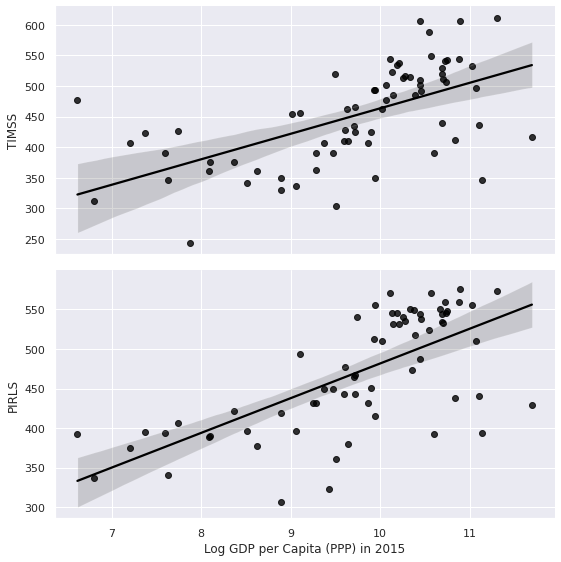

In [152]:
g = sns.PairGrid(merged, x_vars=['Log GDP2015'], y_vars=['TIMSS', 'PIRLS'], height=4, aspect=2)
g.map(sns.regplot, color='black')
g.set(xlabel='Log GDP per Capita (PPP) in 2015')

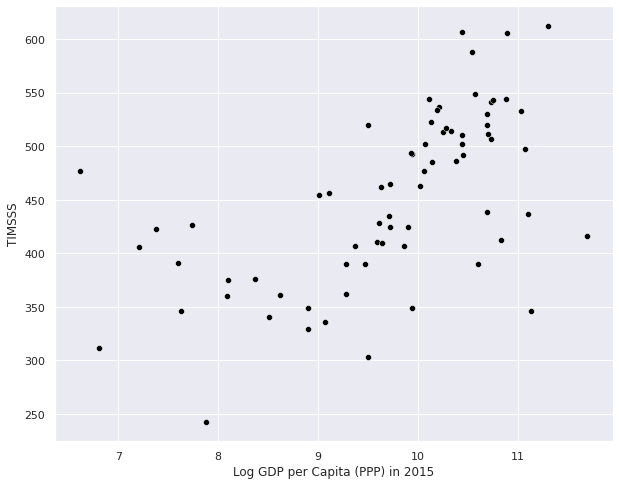

In [140]:
sns.set(rc={'figure.figsize':(10,8)});
f = sns.scatterplot(x= np.log(merged['GDP2015']), y= merged['TIMSS'], color='black');
f.set(xlabel=r'Log GDP per Capita (PPP) in 2015', ylabel= 'TIMSSS');

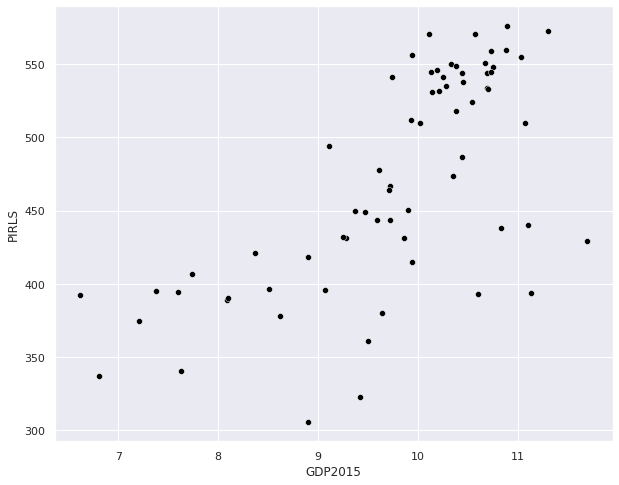

In [100]:
sns.scatterplot(x= np.log(merged['GDP2015']), y= merged['PIRLS'], color='black');